In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from google.colab import files as f, drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
train_data = pd.read_csv('/content/drive/MyDrive/Train_Data (1).csv')
test_data = pd.read_csv('/content/drive/MyDrive/Test_Data (1).csv')
train_data

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,optimal depth-of-win
0,d,3,f,5,a,5,nine
1,d,3,e,5,f,2,eight
2,d,1,g,6,d,7,thirteen
3,c,2,e,8,a,4,ten
4,d,4,a,8,b,1,eight
...,...,...,...,...,...,...,...
21036,d,3,d,1,d,6,twelve
21037,d,3,f,4,a,3,five
21038,b,1,h,4,h,1,ten
21039,c,1,h,7,c,5,fourteen


In [12]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

White King file         0
White King rank         0
White Rook file         0
White Rook rank         0
Black King file         0
Black King rank         0
optimal depth-of-win    0
dtype: int64
White King file    0
White King rank    0
White Rook file    0
White Rook rank    0
Black King file    0
Black King rank    0
dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

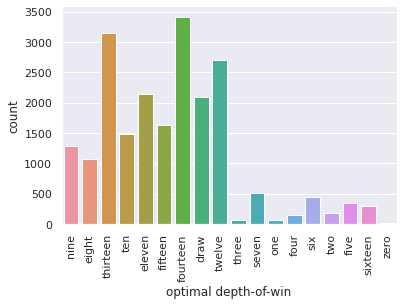

In [13]:
sns.set()
sns.countplot(x = train_data['optimal depth-of-win'])
plt.xticks(rotation=90)

In [14]:
files = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
file_dict = {files[i] : list(enumerate(files))[i][0]+1 for i in range(len(files))}

In [15]:
def encode_labels(df, cols):
  for col in cols:
    df[col] = df[col].replace(file_dict)
  return df

train_data = encode_labels(train_data, ['White King file', 'White Rook file', 'Black King file'])
test_data = encode_labels(test_data, ['White King file', 'White Rook file', 'Black King file'])

In [16]:
target = list(set(list(train_data['optimal depth-of-win'])))
target_dict = {target[i] : list(enumerate(target))[i][0] for i in range(len(target))}
reverse_target_dict = {value : key for key, value in target_dict.items()}
train_data['optimal depth-of-win'] = train_data['optimal depth-of-win'].replace(target_dict)
y_train = train_data['optimal depth-of-win']
train_data = train_data.drop(['optimal depth-of-win'], axis=1)

In [17]:
best_clf = lgb.LGBMClassifier(n_estimators=15000, max_depth=7, num_leaves=31, learning_rate=0.03)
best_clf.fit(train_data, y_train)
y_pred = best_clf.predict(test_data)
y_pred_target = []
for label in y_pred:
  y_pred_target.append(reverse_target_dict[label])

df = pd.DataFrame()
df['prediction'] = y_pred_target
df.to_csv('final.csv', index=False)
f.download('final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>